# Notebook 2 - Plotting

Let's first load the libraries:

In [140]:
import os
import time

import hist
import json
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl
import numpy as np
import pickle
from collections import OrderedDict

## Plots

Finally, let's make some simple plots:

In [119]:
with open("histograms.pkl", "rb") as f:
    h2 = pickle.load(f)
    print(h2.keys())

dict_keys(['muon_eta', 'njets', 'jets_pt', 'ele_eta', 'muon_pt', 'jets_eta', 'nbjets', 'nmuons', 'ele_pt', 'neles'])


In [172]:
### list of bkgs to plot
dictBkgs = OrderedDict()
dictBkgs["ttbar"] = { "color" : "white", "label" : "$t\\bar{t}$" }
dictBkgs["wjets"] = { "color" : "blue", "label" : "EW" }
dictBkgs["single_top_s_chan"] = { "color" : "green", "label" : "t s-channel" }
dictBkgs["single_top_t_chan"] = { "color" : "lightgreen", "label" : "t t-channel" }
dictBkgs["single_top_tW"] = { "color" : "darkgreen", "label" : "tW" }

bkgs = list(dictBkgs.keys())[::-1]
bkgs_colors = [ col["color"] for i, col in dictBkgs.items() ]
bkgs_label = [ col["label"] for i, col in dictBkgs.items() ]

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:872: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


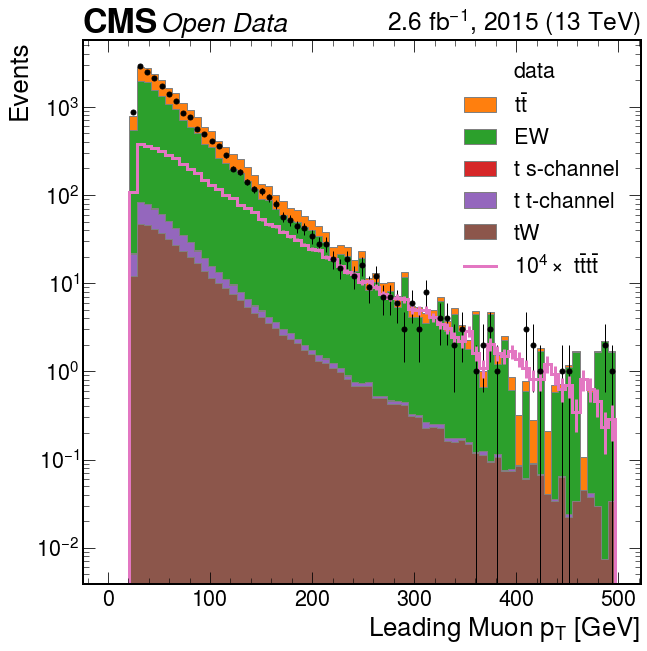

In [175]:
### Run this cell twice to load the CMS style properly

hep.cms.label("Open Data", data=True, lumi=2.6, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
plt.style.use(hep.style.CMS)

hist.Hist.plot1d(h2["muon_pt"][ ::hist.rebin(7), "data", "nominal"], histtype="errorbar", color="black")
hist.Hist.plot1d((0.04*h2["muon_pt"][ ::hist.rebin(7), bkgs, "nominal"]), 
                     stack=True, histtype="fill", linewidth=1, 
                      edgecolor="grey")
hist.Hist.plot1d((1000*h2["muon_pt"][ ::hist.rebin(7), "tttt", "nominal"]), histtype="step", linewidth=3)

plt.legend(["data"]+bkgs_label+["$10^{4} \\times$ $t\\bar{t}t\\bar{t}$"], frameon=False)
plt.xlabel("Leading Muon $p_{T}$ [GeV]")
plt.ylabel("Events")
plt.yscale("log")
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/boost_histogram/_internal/hist.py:872: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  warnings.warn(


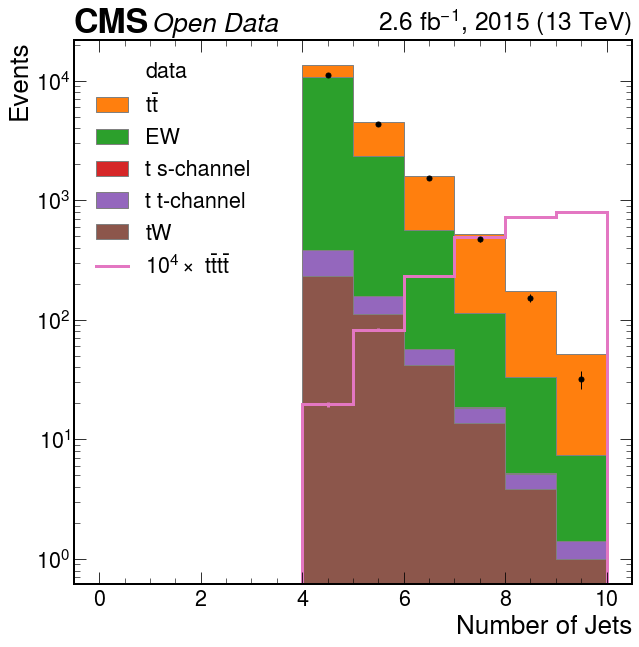

In [174]:
### Run this cell twice to load the CMS style properly

hep.cms.label("Open Data", data=True, lumi=2.6, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
plt.style.use(hep.style.CMS)

hist.Hist.plot1d(h2["njets"][ ::, "data", "nominal"], histtype="errorbar", color="black")
hist.Hist.plot1d((0.04*h2["njets"][ ::, bkgs, "nominal"]), 
                     stack=True, histtype="fill", linewidth=1, 
                      edgecolor="grey")
hist.Hist.plot1d((1000*h2["njets"][ ::, "tttt", "nominal"]), histtype="step", linewidth=3)

plt.legend(["data"]+bkgs_label+["$10^{4} \\times$ $t\\bar{t}t\\bar{t}$"], frameon=False)
plt.xlabel("Number of Jets")
plt.ylabel("Events")
plt.yscale("log")
plt.show()